In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

data_path = "data/flyvis_data"
cell_type_df = pd.read_csv(f'{data_path}/flyvis_cell_type_connectivity.csv')
outgoing_pert_df = pd.read_csv(f"{data_path}/optic flow/outgoing_perturbation_sintel_results.csv")
pair_wise_pert_df = pd.read_csv(f"{data_path}/optic flow/pairwise_perturbation_sintel_results.csv")
origianl_network_res = pd.read_csv(f"{data_path}/optic flow/original_network_sintel_results.csv")

In [2]:
outgoing_pert_df['mean_epe_diff'] = origianl_network_res['mean_epe'].values[0] - outgoing_pert_df['mean_epe']
outgoing_pert_df['median_epe_diff'] = origianl_network_res['median_epe'].values[0] - outgoing_pert_df['median_epe']

pair_wise_pert_df['mean_epe_diff'] = origianl_network_res['mean_epe'].values[0] - pair_wise_pert_df['mean_epe']
pair_wise_pert_df['median_epe_diff'] = origianl_network_res['median_epe'].values[0] - pair_wise_pert_df['median_epe']

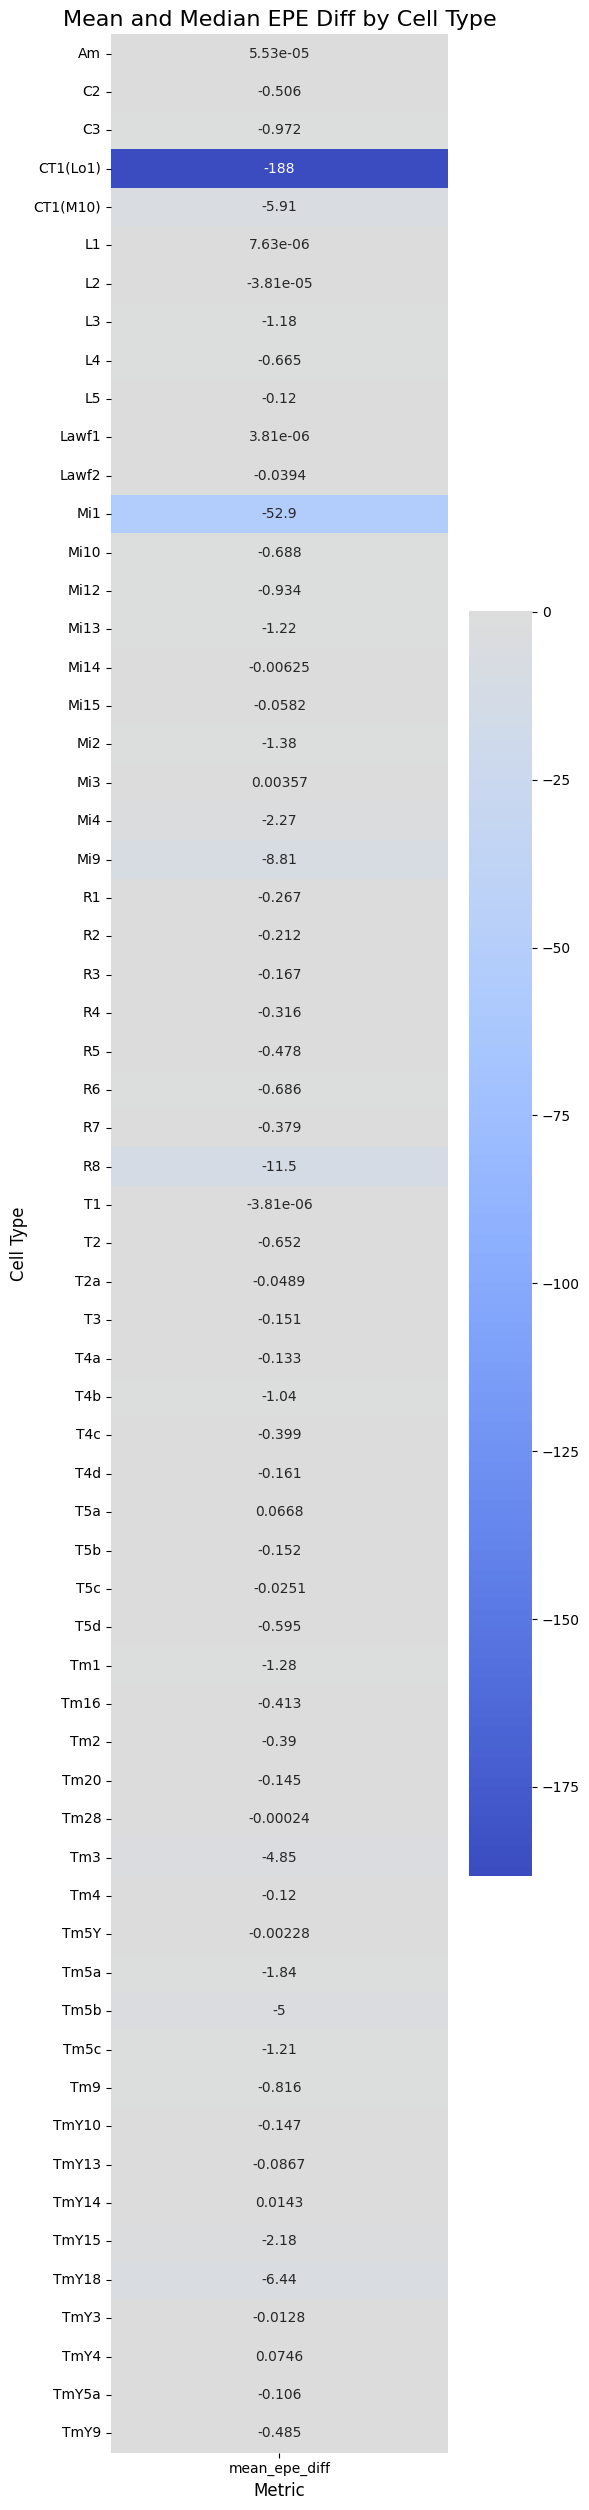

In [17]:
# Prepare the data
heatmap_data = outgoing_pert_df.set_index('source_type')
heatmap_data = heatmap_data[['mean_epe_diff']]

# Calculate a dynamic height: approx 0.4 inches per row
# For ~60 rows, this results in a figure height of ~24 inches
fig_height = max(6, len(heatmap_data) * 0.4)

plt.figure(figsize=(6, fig_height)) # Width=10, Height=Dynamic

sns.heatmap(heatmap_data, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            fmt=".3g",               # "General" format: uses scientific notation only when necessary
            annot_kws={"size": 10},  # Adjust font size of the numbers
            yticklabels=True)        # Ensure every cell type label is drawn

plt.title('Mean and Median EPE Diff by Cell Type', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Cell Type', fontsize=12)
plt.yticks(rotation=0)               # Keep y-labels horizontal for readability
plt.tight_layout()
plt.show()

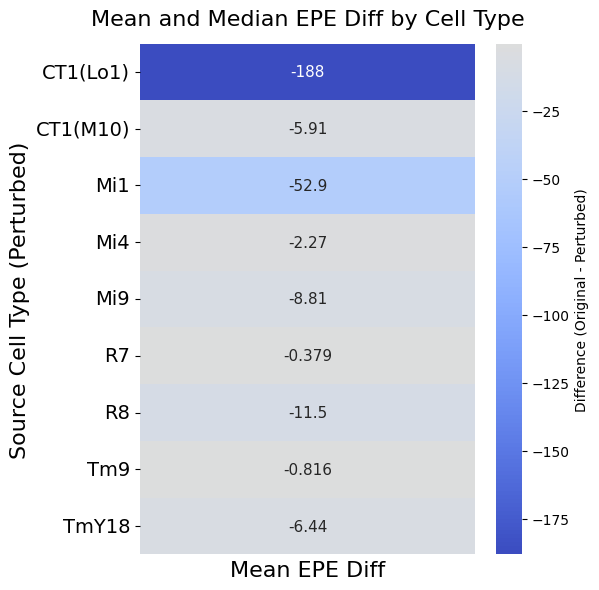

In [30]:
top_src_cell_types = ['CT1(Lo1)', 'CT1(M10)','Mi1', 'Mi4', 'Mi9', 'Tm9', 'R7', 'R8', 'TmY18']
filtered_plot_df = heatmap_data[heatmap_data.index.isin(top_src_cell_types)]
filtered_plot_df


plt.figure(figsize=(6, 6)) # Width=10, Height=Dynamic

ax = sns.heatmap(filtered_plot_df, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            fmt=".3g",               # "General" format: uses scientific notation only when necessary
            annot_kws={"size": 11},  # Adjust font size of the numbers
            xticklabels=False,
            yticklabels=True)        # Ensure every cell type label is drawn
if ax.collections:
    cbar = ax.collections[0].colorbar
    cbar.set_label('Difference (Original - Perturbed)')
ax.set_xlabel('Mean EPE Diff', fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
plt.title('Mean and Median EPE Diff by Cell Type', fontsize=16, y=1.02)
plt.ylabel('Source Cell Type (Perturbed)', fontsize=16)
plt.yticks(rotation=0)               # Keep y-labels horizontal for readability
plt.tight_layout()
plt.show()

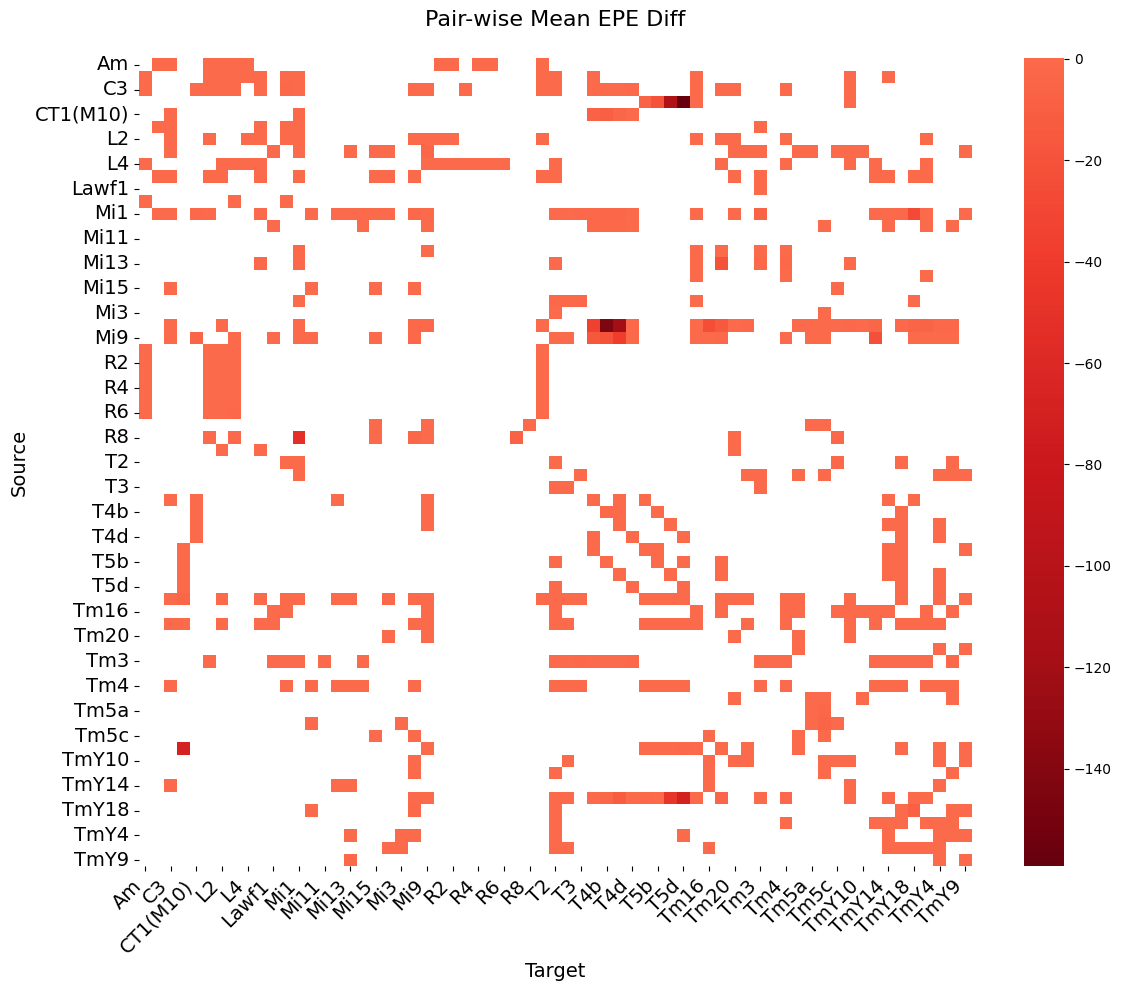

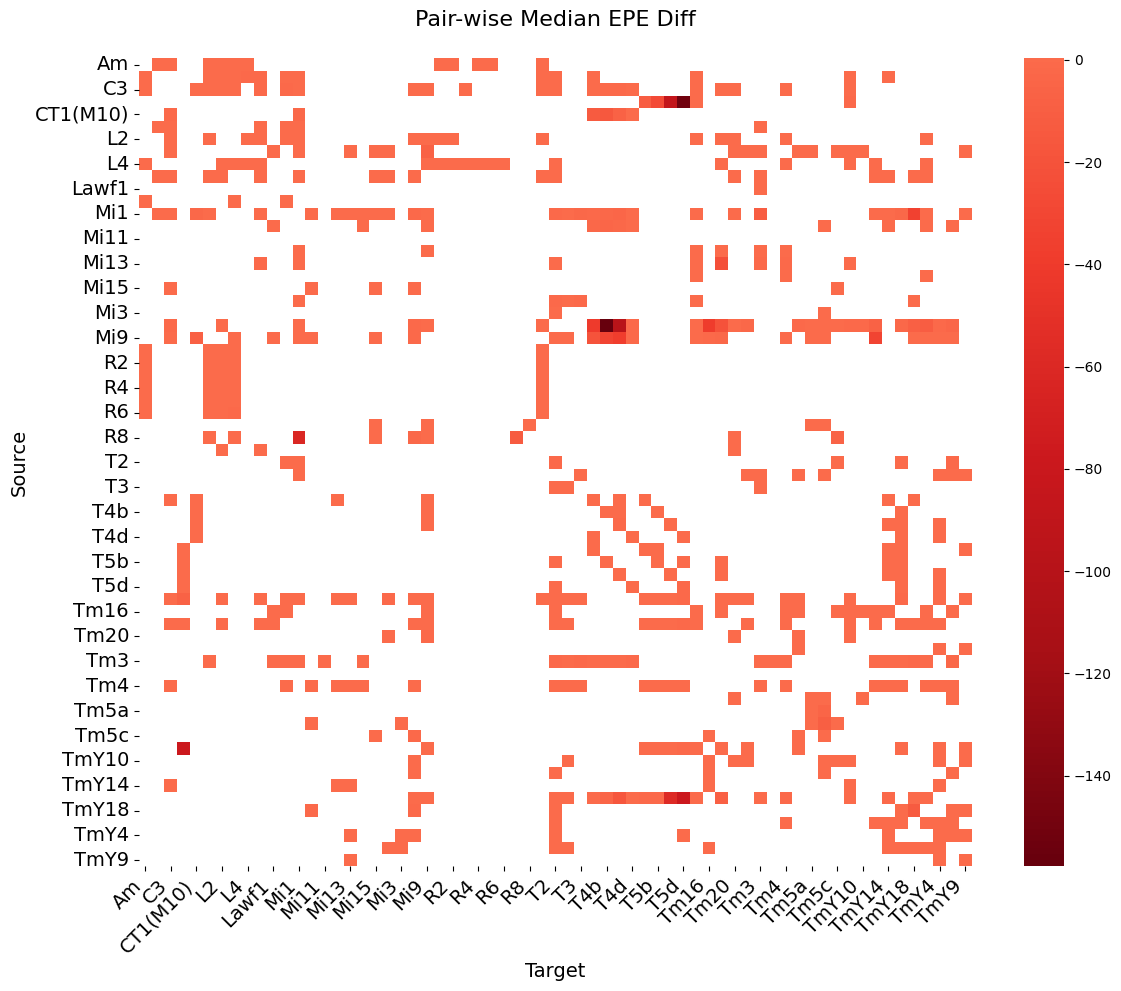

In [4]:
def pair_wise_plot(feature = 'mean_epe_diff', title='Mean'):

    # Get all unique cell types involved (union of source and target)
    all_cells = sorted(list(set(pair_wise_pert_df['source_type'].unique()) |
                            set(pair_wise_pert_df['target_type'].unique())))

    # --- Heatmap 1: Mean ---
    # Pivot and reindex to ensure a square matrix with all cells
    mean_matrix = pair_wise_pert_df.pivot(index='source_type', columns='target_type', values=feature)
    mean_matrix = mean_matrix.reindex(index=all_cells, columns=all_cells)

    plt.figure(figsize=(12, 10))
    # annot=False removes the numbers
    # cmap='Blues_r' uses a reversed blue scale, where large negative values are dark blue and 0 is white
    ax = sns.heatmap(mean_matrix, annot=False, cmap='Reds_r', center=0)
    ax.tick_params(axis='both', labelsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Pair-wise {title} EPE Diff', fontsize=16, y=1.03)
    plt.ylabel('Source', fontsize=14)
    plt.xlabel('Target', fontsize=14)
    plt.tight_layout()
    plt.show()

pair_wise_plot(feature='mean_epe_diff', title='Mean')
pair_wise_plot(feature='median_epe_diff', title='Median')